In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("ushape.csv")

In [3]:
df.head()

,3.159499363321345566e-02,9.869877579082642072e-01,0.000000000000000000e+00
0,2.115098,-0.046244,1.0
1,0.882490,-0.075756,0.0
2,-0.055144,-0.037332,1.0
3,0.829545,-0.539321,1.0
4,2.112857,0.662084,1.0


In [4]:
df['X'] = df['3.159499363321345566e-02'].rename('X')

In [5]:
df['Y'] = df['9.869877579082642072e-01'].rename('Y')

In [6]:
df['class'] = df['0.000000000000000000e+00'].rename('class')

In [7]:
df.drop(columns=['3.159499363321345566e-02','9.869877579082642072e-01','0.000000000000000000e+00'],axis=1,inplace=True)

In [8]:
df.head()

,X,Y,class
0,2.115098,-0.046244,1.0
1,0.882490,-0.075756,0.0
2,-0.055144,-0.037332,1.0
3,0.829545,-0.539321,1.0
4,2.112857,0.662084,1.0


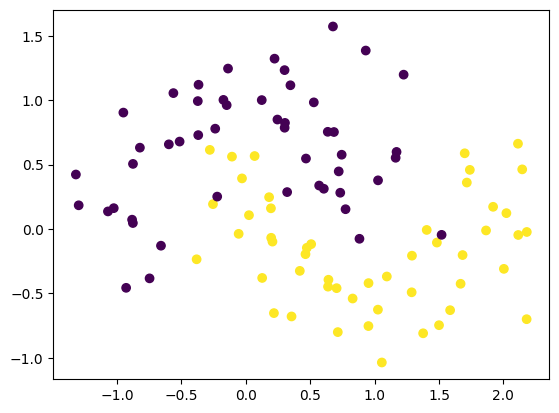

In [9]:
plt.scatter(df['X'],df['Y'],c=df['class'])

In [10]:
X = df.drop(columns=['class'],axis=1)
y = df['class']

In [11]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from keras.layers import Dense

2025-05-23 14:57:29.228138: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1748012249.347019     755 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1748012249.383271     755 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1748012249.672211     755 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1748012249.672270     755 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1748012249.672272     755 computation_placer.cc:177] computation placer alr

In [12]:
model = Sequential()
model.add(Dense(2,activation='tanh',input_dim=2))
model.add(Dense(2,activation='tanh'))
model.add(Dense(2,activation='tanh'))
model.add(Dense(2,activation='tanh'))
model.add(Dense(1,activation='sigmoid'))

/home/zahir/Tf_gpu/tfgpu1/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1748012365.296844     755 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 1767 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 2050, pci bus id: 0000:01:00.0, compute capability: 8.6


In [13]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 2)              │             6 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │             6 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │             6 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 2)              │             6 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 27 (108.00 B)

 Trainable params: 27 (108.00 B)

 Non-trainable params: 0 (0.00 B)

In [14]:
model.get_weights()

[array([[-0.9610952 ,  0.37638557],
        [-0.5215283 , -0.348144  ]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[ 0.47491252, -0.7869838 ],
        [-1.0149719 , -1.1243503 ]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[1.0626198 , 0.4035207 ],
        [0.2518692 , 0.07779396]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[-0.35724133, -0.2364369 ],
        [ 0.5922862 ,  0.6498325 ]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[-0.6176179],
        [ 1.3760554]], dtype=float32),
 array([0.], dtype=float32)]

In [15]:
initial_weights = model.get_weights()

In [16]:
initial_weights[0] = np.random.randn(model.get_weights()[0].shape[0],model.get_weights()[0].shape[1])*0.01
initial_weights[1] = np.zeros(model.get_weights()[1].shape)

initial_weights[2] = np.random.randn(model.get_weights()[2].shape[0],model.get_weights()[2].shape[1])*0.01
initial_weights[3] = np.zeros(model.get_weights()[3].shape)
initial_weights[4] = np.random.randn(model.get_weights()[4].shape[0],model.get_weights()[4].shape[1])*0.01
initial_weights[5] = np.zeros(model.get_weights()[5].shape)
initial_weights[6] = np.random.randn(model.get_weights()[6].shape[0],model.get_weights()[6].shape[1])*0.01
initial_weights[7] = np.zeros(model.get_weights()[7].shape)
initial_weights[8] = np.random.randn(model.get_weights()[8].shape[0],model.get_weights()[8].shape[1])*0.01
initial_weights[9] = np.zeros(model.get_weights()[9].shape)

In [17]:
model.set_weights(initial_weights)

In [18]:
model.get_weights()

[array([[ 0.0008201 , -0.00560051],
        [-0.01124193,  0.00383126]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[-5.4211767e-05, -4.8722257e-03],
        [ 4.1032066e-03,  9.1855852e-03]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[-0.00708663,  0.01673772],
        [-0.01019414,  0.00716249]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[ 0.01319121, -0.00037717],
        [-0.00055906, -0.00779068]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[ 0.00067573],
        [-0.00874752]], dtype=float32),
 array([0.], dtype=float32)]

In [19]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [21]:
history = model.fit(X,y,epochs=100,validation_split=0.2)

Epoch 1/100


I0000 00:00:1748013080.431810     960 service.cc:152] XLA service 0x7efdd8007370 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1748013080.431875     960 service.cc:160]   StreamExecutor device (0): NVIDIA GeForce RTX 2050, Compute Capability 8.6
2025-05-23 15:11:20.485842: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1748013080.708531     960 cuda_dnn.cc:529] Loaded cuDNN version 90300


1/3 ━━━━━━━━━━━━━━━━━━━━ 4s 2s/step - accuracy: 0.4375 - loss: 0.6931

I0000 00:00:1748013081.724108     960 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 358ms/step - accuracy: 0.4505 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.5032 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.4875 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.5188 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.5032 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.5110 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.4954 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.5071 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6931
Epo

In [22]:
model.get_weights()

[array([[ 0.0007985 , -0.00552808],
        [-0.01122073,  0.00376034]], dtype=float32),
 array([-2.6455465e-08, -3.3405406e-08], dtype=float32),
 array([[ 3.8448477e-05, -4.8201629e-03],
        [ 4.0300032e-03,  9.1445837e-03]], dtype=float32),
 array([-1.7215018e-05,  5.2506489e-06], dtype=float32),
 array([[-0.00708033,  0.01672127],
        [-0.01017237,  0.00710387]], dtype=float32),
 array([-0.00072916, -0.00017113], dtype=float32),
 array([[ 0.01147496, -0.00074491],
        [-0.00036165, -0.00618021]], dtype=float32),
 array([-1.1329149e-05,  3.8477997e-06], dtype=float32),
 array([[-1.785510e-05],
        [-2.618564e-05]], dtype=float32),
 array([0.0124754], dtype=float32)]

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 10s 986us/step


<Axes: >

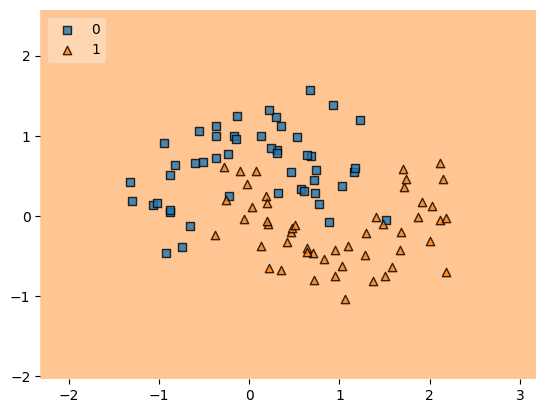

In [23]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X=X.values, y=y.values.astype(int), clf=model, legend=2)